In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import seaborn as sns

In [6]:
import xgboost as xgb

In [7]:
import matplotlib as mlp
%matplotlib inline

In [8]:
df_test= pd.read_csv(r"C:\Users\aniru\OneDrive\Desktop\test.csv")

In [9]:
df_train= pd.read_csv(r"C:\Users\aniru\OneDrive\Desktop\train.csv")

In [10]:
df_train.head(5)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


In [11]:
df_test.head(5)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural,3300
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban,11700
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban,11700
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural,5400
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural,9600


In [12]:
#Saving the ID
train_id= df_train["id"]
test_id= df_test["id"]

In [13]:
df_train.drop("id", axis = 1, inplace = True)
df_test.drop("id", axis = 1, inplace = True)

In [14]:
import matplotlib.pyplot as plt

In [15]:
a = list(df_train['perc_premium_paid_by_cash_credit'])

In [16]:
max(a)

1.0

In [17]:
min(a)

0.0

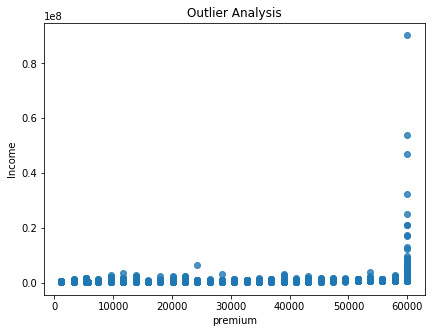

In [18]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
g = sns.regplot(x=df_train['premium'], y=df_train['Income'], fit_reg=False).set_title("Outlier Analysis")

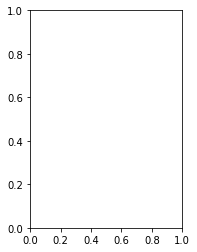

In [19]:
plt.subplot(1, 2, 2)                                                                                
df_train = df_train.drop(df_train[(df_train['Income']>20000000)].index)


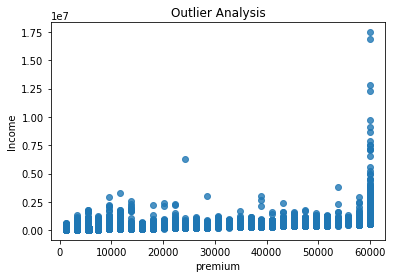

In [20]:
g = sns.regplot(x=df_train['premium'], y=df_train['Income'], fit_reg=False).set_title("Outlier Analysis")

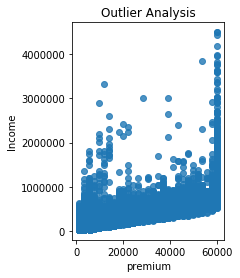

In [21]:
plt.subplot(1, 2, 2)                                                                                
df_train = df_train.drop(df_train[(df_train['Income']>5000000)].index)
g = sns.regplot(x=df_train['premium'], y=df_train['Income'], fit_reg=False).set_title("Outlier Analysis")

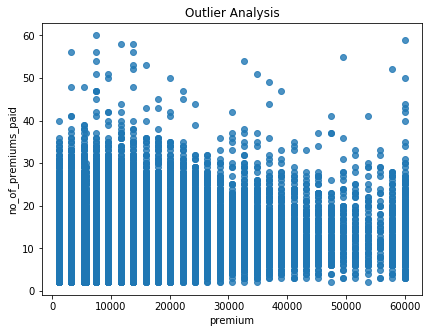

In [22]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
g = sns.regplot(x=df_train['premium'], y=df_train['no_of_premiums_paid'], fit_reg=False).set_title("Outlier Analysis")

In [23]:
#savinf the length for use later

ntrain = df_train.shape[0]
ntest = df_test.shape[0]

In [24]:
y_train = df_train.renewal.values


In [25]:
#Concatenate train and test data

all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['renewal'], axis=1, inplace=True)

print("all_data shape: {}".format(all_data.shape))

all_data shape: (114051, 11)


C:\Users\aniru\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


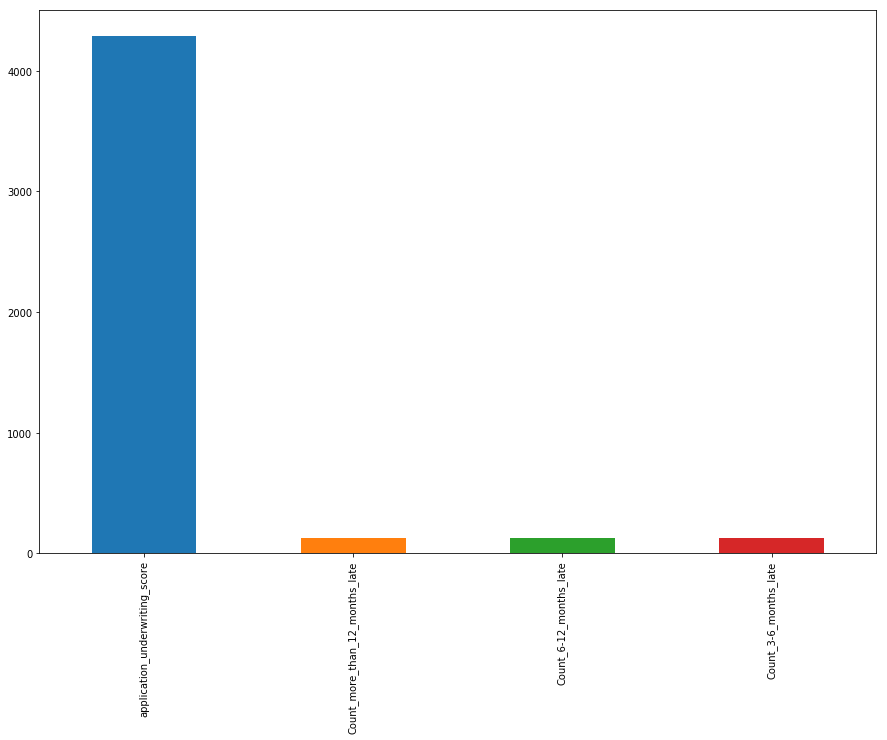

In [26]:
all_data_na = all_data.isnull().sum()

# get rid of all the values with 0 missing values
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
plt.subplots(figsize =(15, 10))
all_data_na.plot(kind='bar');

In [27]:
all_data['application_underwriting_score'] = all_data['application_underwriting_score'].fillna(all_data['application_underwriting_score'].mode()[0])

In [28]:
all_data['Count_more_than_12_months_late'] = all_data['Count_more_than_12_months_late'].fillna(all_data['Count_more_than_12_months_late'].mode()[0])
all_data['Count_3-6_months_late'] = all_data['Count_3-6_months_late'].fillna(all_data['Count_3-6_months_late'].mode()[0])
all_data['Count_6-12_months_late'] = all_data['Count_6-12_months_late'].fillna(all_data['Count_6-12_months_late'].mode()[0])

In [29]:
all_data_na = all_data.isnull().sum()
print("Features with missing values: ", all_data_na.drop(all_data_na[all_data_na == 0].index))

('Features with missing values: ', Series([], dtype: int64))


In [30]:
import seaborn as sns
mycols = ["#66c2ff", "#5cd6d6", "#00cc99", "#85e085", "#ffd966", "#ffb366", "#ffb3b3", "#dab3ff", "#c2c2d6"]
sns.set_palette(palette = mycols, n_colors = 4)

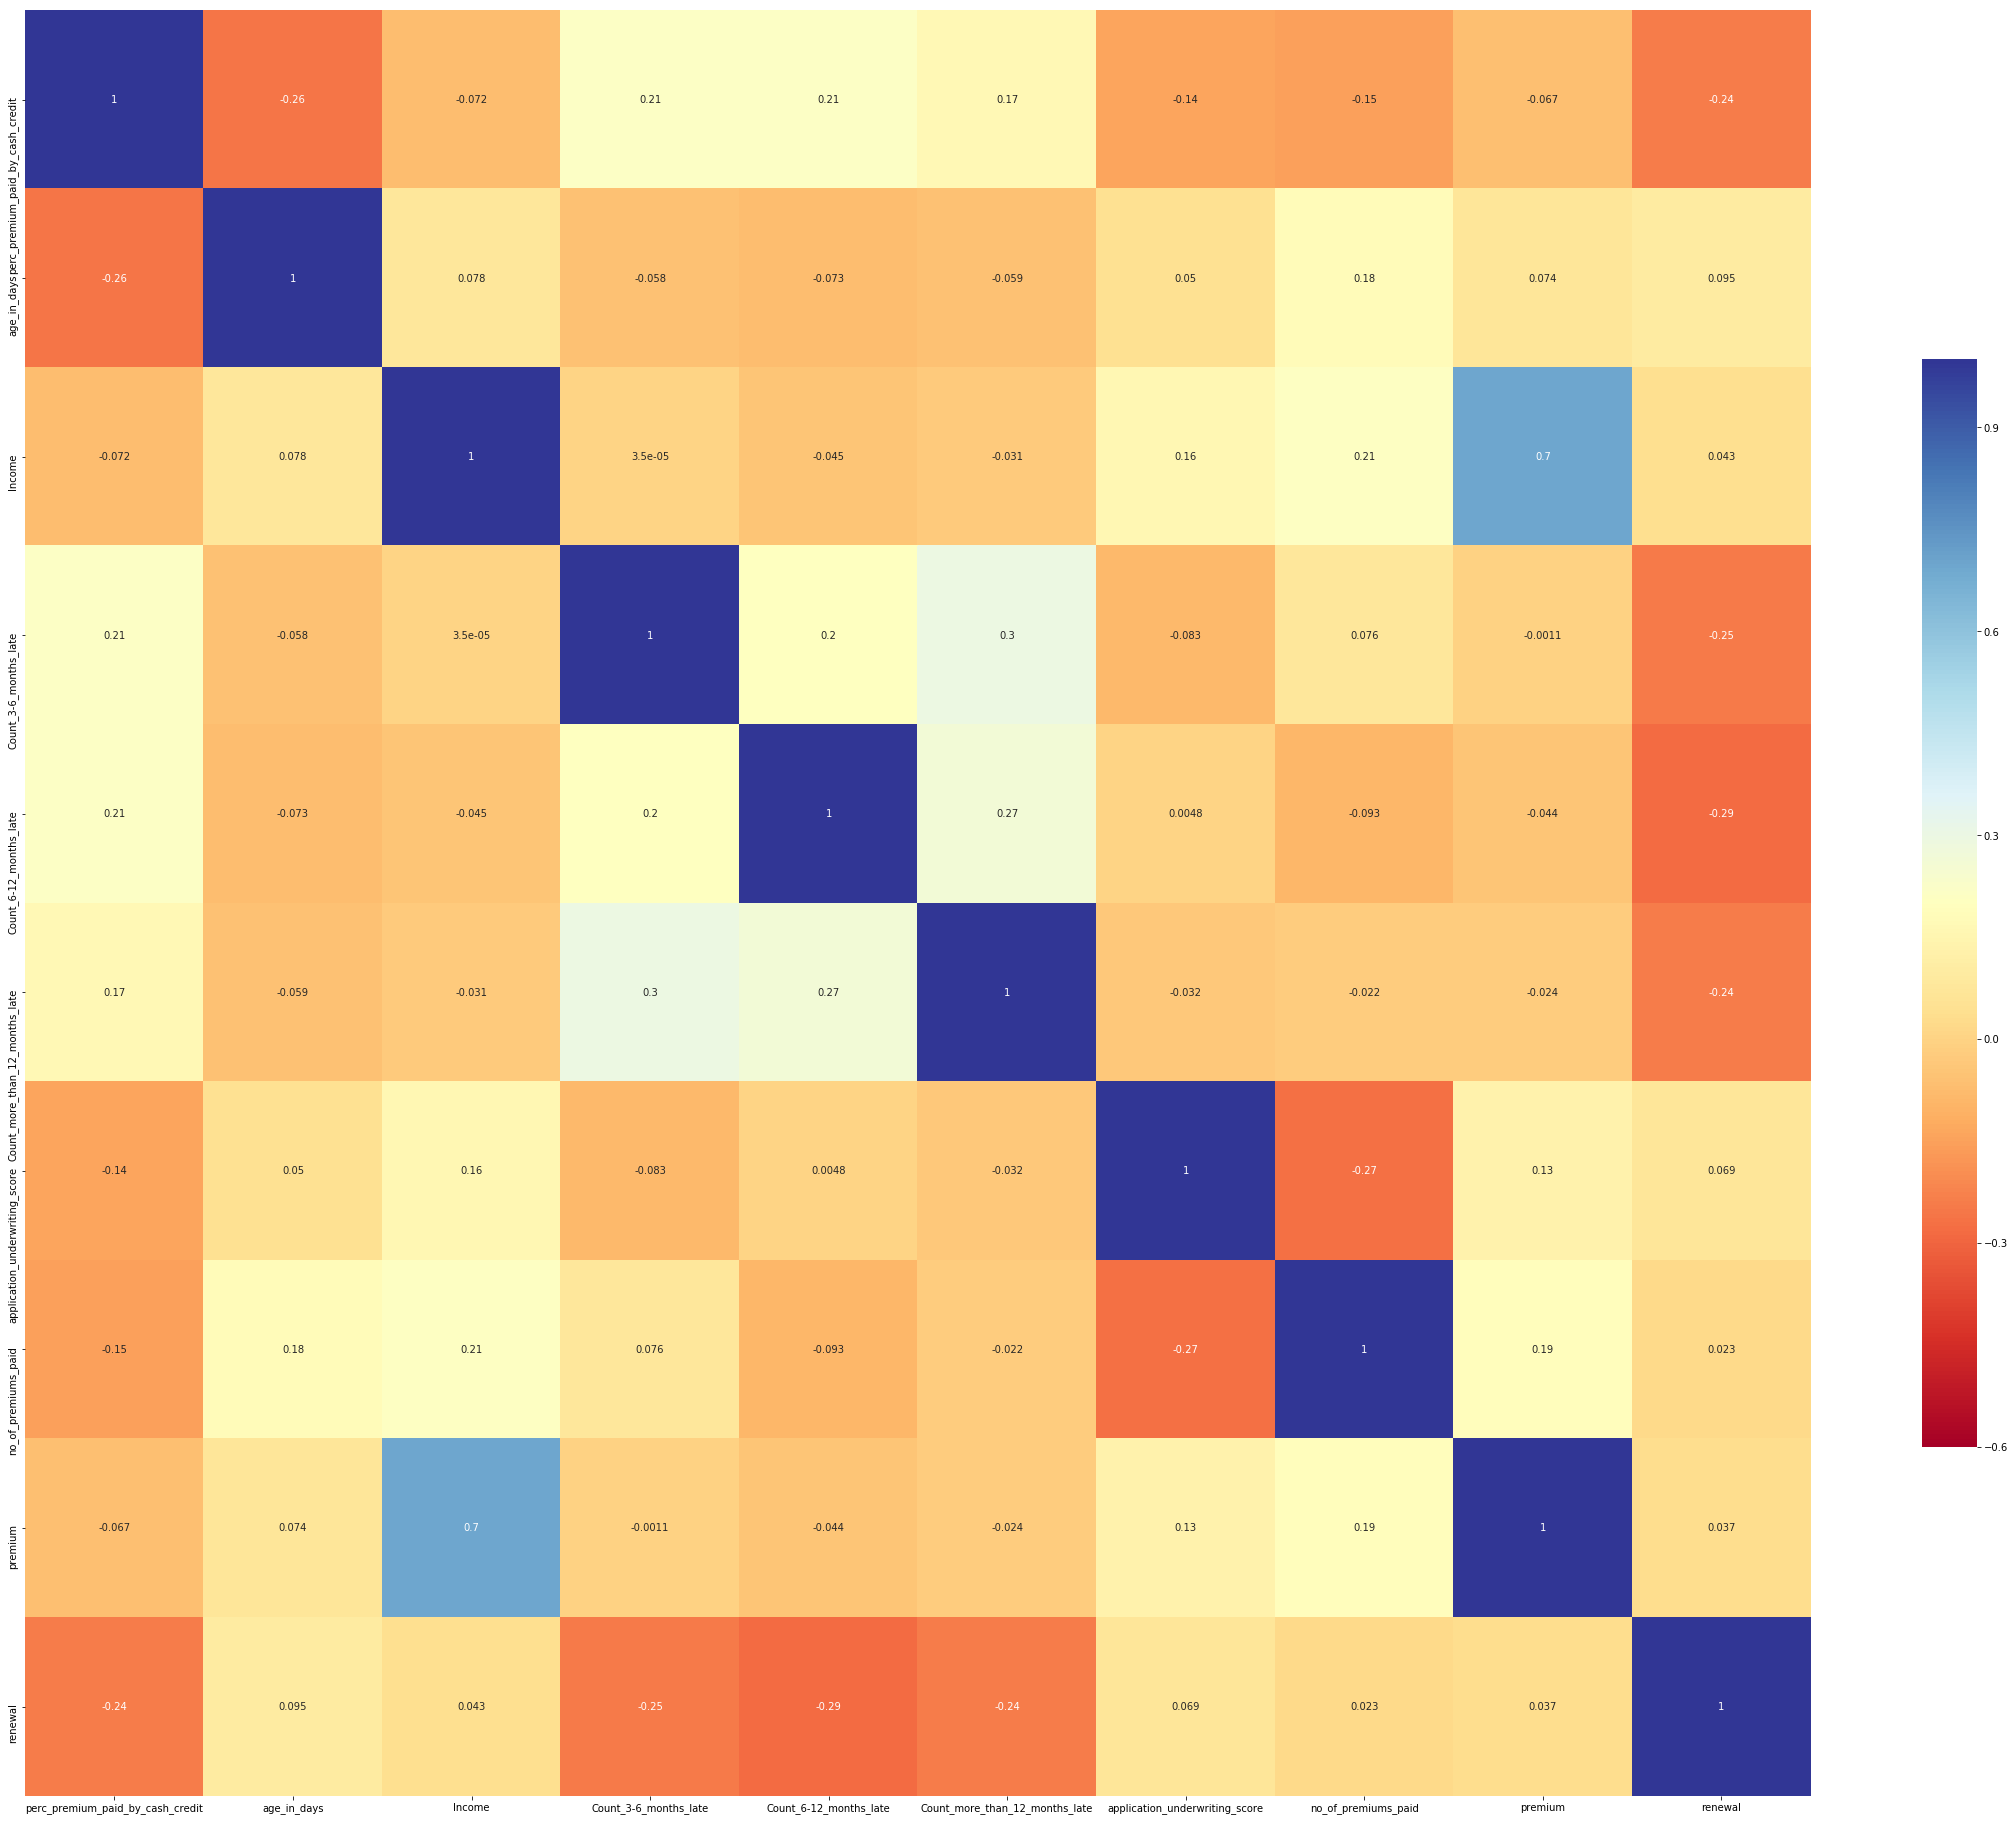

In [31]:
corr = df_train.corr()
plt.subplots(figsize=(40, 40))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(corr, cmap="RdYlBu", vmax=1, vmin=-0.6, center=0.2, square=True, linewidths=0, cbar_kws={"shrink": .5}, annot = True);

In [32]:
#Important features for Renewal
#1. Age: age_in_days
#2. Application underwriting score: application_underwriting_score
#3. Income
#4. premium
#5. no. of premiums paid

In [33]:
all_data["age_in_days-2"] = all_data["age_in_days"] ** 2

In [34]:
all_data["application_underwriting_score-2"] = all_data["application_underwriting_score"] ** 2

In [35]:
all_data["premium-2"] = all_data["premium"] ** 2

In [36]:
all_data["Income-2"] = all_data["Income"] ** 2
all_data["no_of_premiums_paid-2"] = all_data["no_of_premiums_paid"] ** 2

In [37]:
all_data["age_in_days-3"] = all_data["age_in_days"] ** 3
all_data["application_underwriting_score-3"] = all_data["application_underwriting_score"] ** 3
all_data["premium-3"] = all_data["premium"] ** 3
all_data["Income-3"] = all_data["Income"] ** 3
all_data["no_of_premiums_paid-3"] = all_data["no_of_premiums_paid"] ** 3

In [38]:
all_data["age_in_days-sqrt"] = np.sqrt(all_data["age_in_days"]) 
all_data["application_underwriting_score-sqrt"] = np.sqrt(all_data["application_underwriting_score"])
all_data["premium-sqrt"] = np.sqrt(all_data["premium"]) 
all_data["Income-sqrt"] = np.sqrt(all_data["Income"]) 
all_data["no_of_premiums_paid-sqrt"] = np.sqrt(all_data["no_of_premiums_paid"])

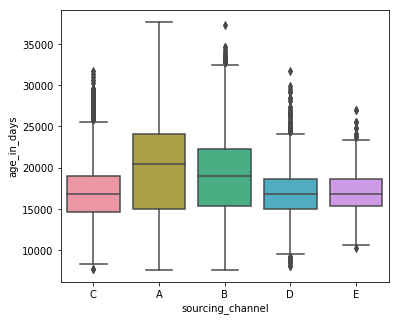

In [39]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="sourcing_channel", y="age_in_days", data=df_train);


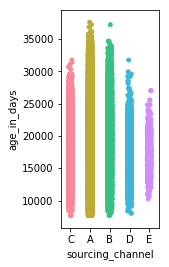

In [40]:
plt.subplot(1, 3, 2)
sns.stripplot(x="sourcing_channel", y="age_in_days", data=df_train, size = 5, jitter = True,);



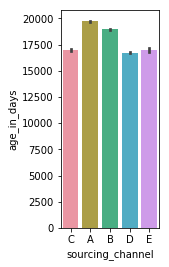

In [41]:
plt.subplot(1, 3, 3)
sns.barplot(x="sourcing_channel", y="age_in_days", data=df_train);

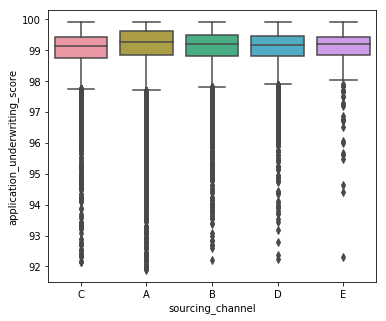

In [42]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="sourcing_channel", y="application_underwriting_score", data=df_train);


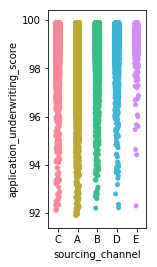

In [43]:
plt.subplot(1, 3, 2)
sns.stripplot(x="sourcing_channel", y="application_underwriting_score", data=df_train, size = 5, jitter = True,);

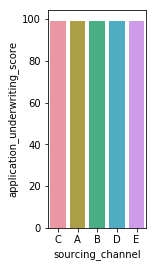

In [44]:
plt.subplot(1, 3, 3)
sns.barplot(x="sourcing_channel", y="application_underwriting_score", data=df_train);

In [45]:
all_data['sourcing_channel'] = all_data['sourcing_channel'].map({"A":4, "B":3, "C":2, "D":1, "E":2})
all_data['sourcing_channel'].unique()

array([2, 4, 3, 1], dtype=int64)

In [46]:
all_data['sourcing_channel']

0         2
1         4
2         2
3         4
4         3
5         3
6         3
7         4
8         4
9         4
10        2
11        3
12        4
13        4
14        1
15        4
16        4
17        4
18        4
19        2
20        4
21        4
22        4
23        2
24        4
25        4
26        4
27        2
28        4
29        3
         ..
114021    3
114022    4
114023    4
114024    2
114025    4
114026    4
114027    3
114028    4
114029    4
114030    3
114031    3
114032    2
114033    3
114034    1
114035    2
114036    4
114037    2
114038    4
114039    3
114040    1
114041    4
114042    4
114043    2
114044    4
114045    1
114046    4
114047    4
114048    3
114049    4
114050    4
Name: sourcing_channel, Length: 114051, dtype: int64

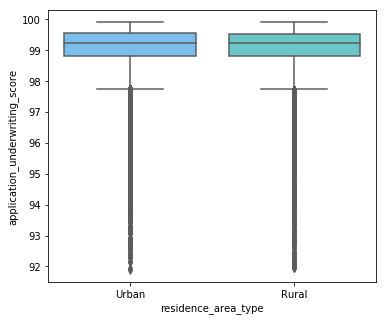

In [47]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="residence_area_type", y="application_underwriting_score", data=df_train);


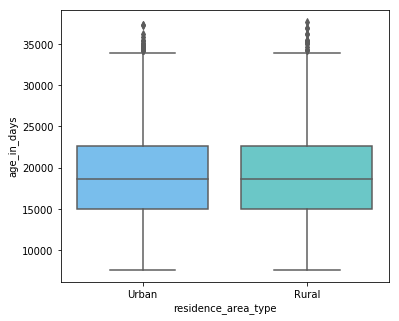

In [48]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="residence_area_type", y="age_in_days", data=df_train);


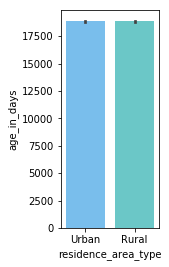

In [49]:
plt.subplot(1, 3, 3)
sns.barplot(x="residence_area_type", y="age_in_days", data=df_train);

In [50]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le= LabelEncoder()
all_data["residence_area_type"]=le.fit_transform(all_data["residence_area_type"])


In [51]:
train = all_data[:ntrain]
test = all_data[ntrain:]

print(train.shape)
print(test.shape)

(79827, 26)
(34224, 26)


In [52]:
from xgboost import XGBClassifier
from xgboost import plot_importance
model = xgb.XGBClassifier()
model.fit(train, y_train)



XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

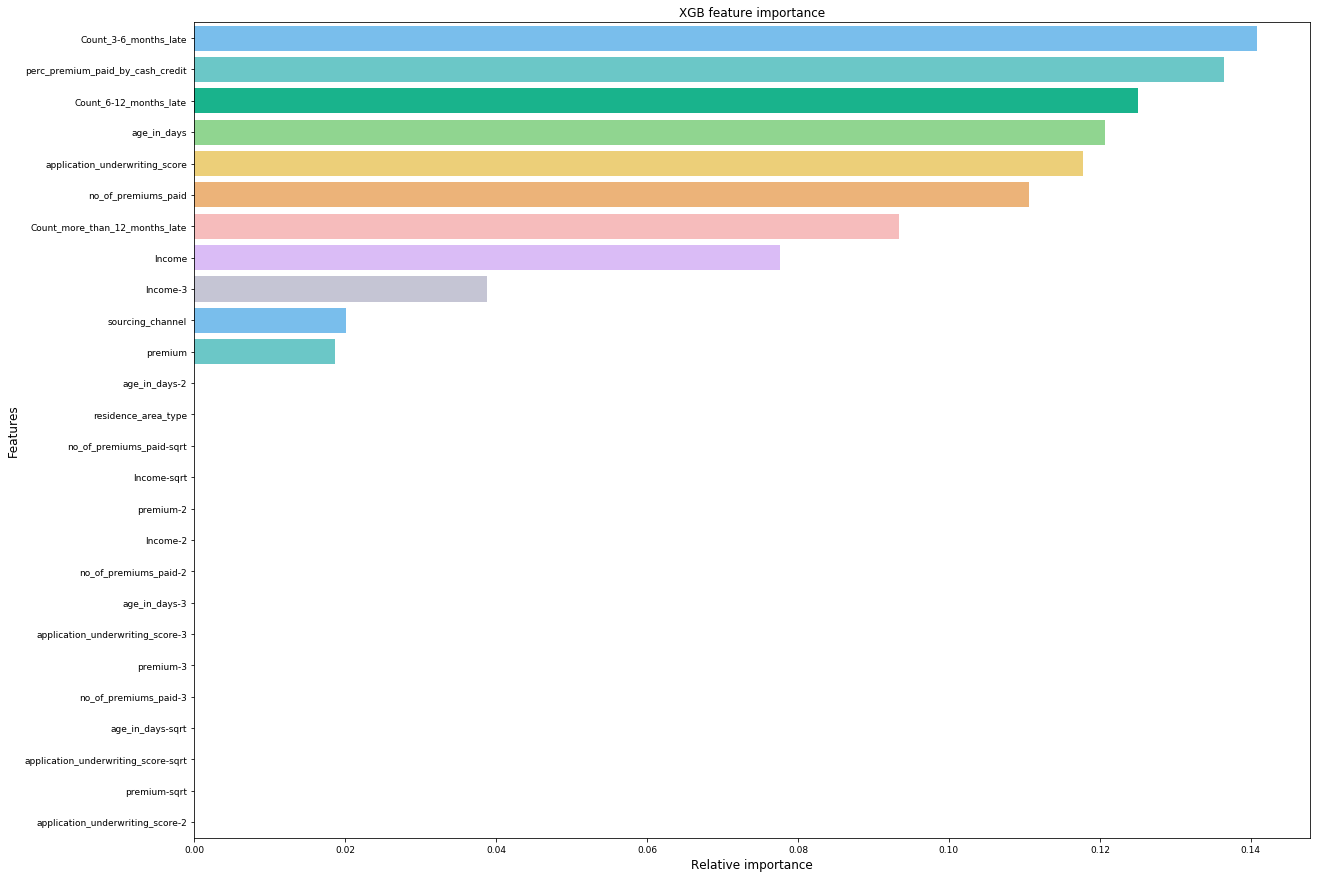

In [53]:
# Sort feature importances from GBC model trained earlier
indices = np.argsort(model.feature_importances_)[::-1]
indices = indices[:75]

# Visualise these with a barplot
plt.subplots(figsize=(20, 15))
g = sns.barplot(y=train.columns[indices], x = model.feature_importances_[indices], orient='h', palette = mycols)
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("XGB feature importance");

In [54]:
xgb_train = train.copy()
xgb_test = test.copy()

In [55]:
import xgboost as xgb

from sklearn.feature_selection import SelectFromModel

xgb_train = train.copy()
xgb_test = test.copy()

import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(xgb_train, y_train)

# Allow the feature importances attribute to select the most important features
xgb_feat_red = SelectFromModel(model, prefit = True)

# Reduce estimation, validation and test datasets
xgb_train = xgb_feat_red.transform(xgb_train)
xgb_test = xgb_feat_red.transform(xgb_test)


print("Results of 'feature_importances_':")
print('X_train: ', xgb_train.shape, '\nX_test: ', xgb_test.shape)

Results of 'feature_importances_':
('X_train: ', (79827L, 9L), '\nX_test: ', (34224L, 9L))


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(xgb_train, y_train, test_size=0.3, random_state=42, stratify=y_train)

In [57]:
print('X_train: ', X_train.shape, '\nX_test: ', X_test.shape, '\nY_train: ', Y_train.shape, '\nY_test: ', Y_test.shape)

('X_train: ', (55878L, 9L), '\nX_test: ', (23949L, 9L), '\nY_train: ', (55878L,), '\nY_test: ', (23949L,))


In [58]:
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_auc_score

In [59]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [60]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import lightgbm as lgb
import xgboost as xgb

In [61]:
model = XGBClassifier()
model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [188]:

def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    predictions= []
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train, label=Y_train)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X_train, Y_train ,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_test)
    predictions = alg.predict_proba(X_test)[:,1]
    
    
    #Print model report:
    #print("\nModel Report")
    print("Accuracy : %.4g" % accuracy_score(Y_test, dtrain_predictions))
    print("AUC Score (Train): %f" % roc_auc_score(Y_test, predictions))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    return predictions

In [192]:
def modelfitfin(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    predictions= []
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train, label=Y_train)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X_train, Y_train ,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(xgb_test)
    predictions = alg.predict_proba(xgb_test)[:,1]
    
    
    #Print model report:
    #print("\nModel Report")
    #print("Accuracy : %.4g" % accuracy_score(Y_test, dtrain_predictions))
    #print("AUC Score (Train): %f" % roc_auc_score(Y_test, predictions))
                    
   
    return predictions

In [246]:
def modelfitfinal(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    predictions= []
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(stacked_validation_train, label=Y_test)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(stacked_validation_train, Y_test ,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(stacked_test_train)
    predictions = alg.predict_proba(stacked_test_train)[:,1]
    
    
    #Print model report:
    #print("\nModel Report")
    #print("Accuracy : %.4g" % accuracy_score(Y_test, dtrain_predictions))
    #print("AUC Score (Train): %f" % roc_auc_score(Y_test, predictions))
                    
   
    return predictions

In [256]:
xgb_final= []
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=7,
 min_child_weight=5,
 reg_alpha=100.1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb_final= modelfitfinal(xgb1, stacked_validation_train, Y_test)


C:\Users\aniru\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [229]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}



In [243]:
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,reg_alpha=100.1,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch1.fit(stacked_validation_train, Y_test)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.84005, std: 0.00859, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.84095, std: 0.00891, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.84059, std: 0.00878, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.84011, std: 0.00841, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.84067, std: 0.00855, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.84105, std: 0.00880, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.83974, std: 0.00865, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.84053, std: 0.00865, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.84105, std: 0.00882, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.84000, std: 0.00847, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.84052, std: 0.00866, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.84105, std: 0.00882, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 7, 'min_child_weight': 5

In [231]:
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)



In [232]:
gsearch2.fit(stacked_validation_train, Y_test)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.83745, std: 0.00793, params: {'max_depth': 4, 'min_child_weight': 4},
  mean: 0.83819, std: 0.00788, params: {'max_depth': 4, 'min_child_weight': 5},
  mean: 0.83843, std: 0.00772, params: {'max_depth': 4, 'min_child_weight': 6},
  mean: 0.83431, std: 0.00780, params: {'max_depth': 5, 'min_child_weight': 4},
  mean: 0.83469, std: 0.00758, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.83466, std: 0.00790, params: {'max_depth': 5, 'min_child_weight': 6},
  mean: 0.83090, std: 0.00754, params: {'max_depth': 6, 'min_child_weight': 4},
  mean: 0.83098, std: 0.00703, params: {'max_depth': 6, 'min_child_weight': 5},
  mean: 0.83062, std: 0.00772, params: {'max_depth': 6, 'min_child_weight': 6}],
 {'max_depth': 4, 'min_child_weight': 6},
 0.8384323212986621)

C:\Users\aniru\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy : 0.9398
AUC Score (Train): 0.847520


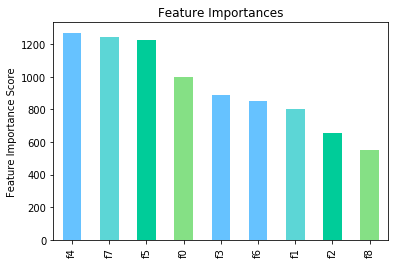

In [68]:
xgb4 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=3,
 min_child_weight=5,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
pred= modelfit(xgb4,X_train, Y_train)

In [69]:
print(pred)

None


In [70]:
#submission = pd.DataFrame()
#submission['id'] = test_id
#submission['renewal'] = pd.Series(pred)

In [71]:
#submission.to_csv('submission.csv',index=False)

In [233]:
param_test2b = {
 'min_child_weight':[4,5,10,12]
}
gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=4,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=4,iid=False, cv=5)


In [234]:
gsearch2b.fit(stacked_validation_train, Y_test)
gsearch2b.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.83745, std: 0.00793, params: {'min_child_weight': 4},
  mean: 0.83819, std: 0.00788, params: {'min_child_weight': 5},
  mean: 0.83875, std: 0.00850, params: {'min_child_weight': 10},
  mean: 0.83809, std: 0.00835, params: {'min_child_weight': 12}],
 {'max_depth': 4, 'min_child_weight': 6},
 0.8384323212986621)

In [235]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)


In [236]:
gsearch3.fit(stacked_validation_train, Y_test)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.83843, std: 0.00772, params: {'gamma': 0.0},
  mean: 0.83827, std: 0.00836, params: {'gamma': 0.1},
  mean: 0.83780, std: 0.00769, params: {'gamma': 0.2},
  mean: 0.83824, std: 0.00768, params: {'gamma': 0.3},
  mean: 0.83812, std: 0.00794, params: {'gamma': 0.4}],
 {'gamma': 0.0},
 0.8384323212986621)

C:\Users\aniru\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy : 0.9402
AUC Score (Train): 0.847119


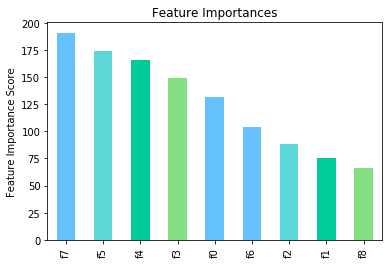

In [76]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0.4,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb2, X_train, Y_train)

In [237]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)


In [238]:
gsearch4.fit(stacked_validation_train, Y_test)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.83555, std: 0.00854, params: {'subsample': 0.6, 'colsample_bytree': 0.6},
  mean: 0.83517, std: 0.00838, params: {'subsample': 0.7, 'colsample_bytree': 0.6},
  mean: 0.83625, std: 0.00656, params: {'subsample': 0.8, 'colsample_bytree': 0.6},
  mean: 0.83649, std: 0.00825, params: {'subsample': 0.9, 'colsample_bytree': 0.6},
  mean: 0.83555, std: 0.00854, params: {'subsample': 0.6, 'colsample_bytree': 0.7},
  mean: 0.83517, std: 0.00838, params: {'subsample': 0.7, 'colsample_bytree': 0.7},
  mean: 0.83625, std: 0.00656, params: {'subsample': 0.8, 'colsample_bytree': 0.7},
  mean: 0.83649, std: 0.00825, params: {'subsample': 0.9, 'colsample_bytree': 0.7},
  mean: 0.83634, std: 0.00769, params: {'subsample': 0.6, 'colsample_bytree': 0.8},
  mean: 0.83635, std: 0.00797, params: {'subsample': 0.7, 'colsample_bytree': 0.8},
  mean: 0.83620, std: 0.00836, params: {'subsample': 0.8, 'colsample_bytree': 0.8},
  mean: 0.83632, std: 0.00781, params: {'subsample': 0.9, 'colsample_bytree'

C:\Users\aniru\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy : 0.9402
AUC Score (Train): 0.847119


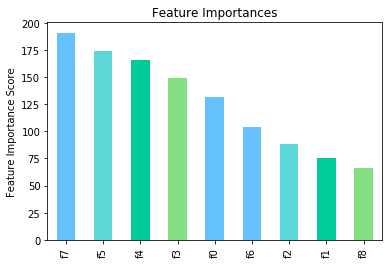

In [79]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0.4,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb2, X_train, Y_train)

In [239]:
param_test5 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)


In [240]:
gsearch5.fit(stacked_validation_train, Y_test)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.83646, std: 0.00713, params: {'subsample': 0.75, 'colsample_bytree': 0.75},
  mean: 0.83625, std: 0.00656, params: {'subsample': 0.8, 'colsample_bytree': 0.75},
  mean: 0.83649, std: 0.00799, params: {'subsample': 0.85, 'colsample_bytree': 0.75},
  mean: 0.83575, std: 0.00853, params: {'subsample': 0.75, 'colsample_bytree': 0.8},
  mean: 0.83620, std: 0.00836, params: {'subsample': 0.8, 'colsample_bytree': 0.8},
  mean: 0.83652, std: 0.00799, params: {'subsample': 0.85, 'colsample_bytree': 0.8},
  mean: 0.83575, std: 0.00853, params: {'subsample': 0.75, 'colsample_bytree': 0.85},
  mean: 0.83620, std: 0.00836, params: {'subsample': 0.8, 'colsample_bytree': 0.85},
  mean: 0.83652, std: 0.00799, params: {'subsample': 0.85, 'colsample_bytree': 0.85}],
 {'colsample_bytree': 0.8, 'subsample': 0.85},
 0.8365203608663375)

In [241]:
param_test6 = {
 'reg_alpha':[99.5,99.6,99.7,99.8,99.9,100,100.1,100.2,100.3,100.4,100.5]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)


In [242]:
gsearch6.fit(stacked_validation_train, Y_test)
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: 0.84090, std: 0.00856, params: {'reg_alpha': 99.5},
  mean: 0.84095, std: 0.00866, params: {'reg_alpha': 99.6},
  mean: 0.84095, std: 0.00866, params: {'reg_alpha': 99.7},
  mean: 0.84102, std: 0.00864, params: {'reg_alpha': 99.8},
  mean: 0.84101, std: 0.00867, params: {'reg_alpha': 99.9},
  mean: 0.84099, std: 0.00868, params: {'reg_alpha': 100},
  mean: 0.84099, std: 0.00868, params: {'reg_alpha': 100.1},
  mean: 0.84125, std: 0.00931, params: {'reg_alpha': 100.2},
  mean: 0.84127, std: 0.00928, params: {'reg_alpha': 100.3},
  mean: 0.84128, std: 0.00929, params: {'reg_alpha': 100.4},
  mean: 0.84125, std: 0.00932, params: {'reg_alpha': 100.5}],
 {'reg_alpha': 100.4},
 0.8412790305720875)

In [84]:
xgb3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=100.1,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)


C:\Users\aniru\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy : 0.9387
AUC Score (Train): 0.845849


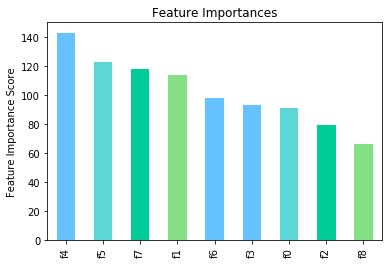

In [85]:
modelfit(xgb3, X_train, Y_train)

In [99]:
xgb4 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

C:\Users\aniru\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy : 0.9402
AUC Score (Train): 0.847517


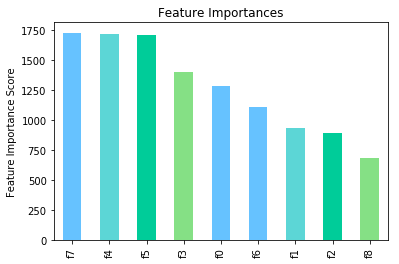

In [100]:
pred_xg = modelfit(xgb4, X_train, Y_train)

In [193]:
pred_xg_t= modelfitfin(xgb4, X_train, Y_train)

C:\Users\aniru\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [88]:
from sklearn.ensemble import AdaBoostClassifier

In [274]:
seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits=10, random_state=seed)

model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model,  X_train, Y_train, cv=kfold)
print(results.mean())

0.9377214835185322


In [170]:
model.fit( X_train, Y_train)
dtrain_predictions = model.predict(X_test)
predictions = model.predict_proba(X_test)[:,1]
    
    
    #Print model report:
    #print("\nModel Report")
print("Accuracy : %.4g" % accuracy_score(Y_test, dtrain_predictions))
print("AUC Score (Train): %f" % roc_auc_score(Y_test, predictions))
pred_ad=[]
pred_ad= predictions

Accuracy : 0.9385
AUC Score (Train): 0.839902


In [275]:
model.fit(stacked_validation_train, Y_test)
dtrain_predictions = model.predict(stacked_test_train)
predictions = model.predict_proba(stacked_test_train)[:,1]
    
    
    #Print model report:
    #print("\nModel Report")
#print("Accuracy : %.4g" % accuracy_score(Y_test, dtrain_predictions))
#print("AUC Score (Train): %f" % roc_auc_score(Y_test, predictions))
ada_final=[]
ada_final= predictions

In [195]:
predictions = model.predict_proba(xgb_test)[:,1]
pred_ad_t=[]
pred_ad_t= predictions

In [90]:
seed = 7
num_trees = 100
max_features = 3
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model,  X_train, Y_train, cv=kfold)
print(results.mean())

0.9376498855418915


In [91]:
seed = 7
num_trees = 100
max_features = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model,X_train, Y_train, cv=kfold)
print(results.mean())

0.9338201705334207


In [92]:

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [151]:
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 110.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 207.4min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [228]:
rf_random.fit(stacked_validation_train, Y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 69.6min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [153]:
pred_rf=[]
dtrain_predictions = rf_random.predict(X_test)
pred_rf = rf_random.predict_proba(X_test)[:,1]
    
    
    #Print model report:
    #print("\nModel Report")
print("Accuracy : %.4g" % accuracy_score(Y_test, dtrain_predictions))
print("AUC Score (Train): %f" % roc_auc_score(Y_test, predictions))

Accuracy : 0.9398
AUC Score (Train): 0.846176


In [213]:
pred_rf_t=[]
#dtrain_predictions = rf_random.predict(xgb_test)
pred_rf_t = rf_random.predict_proba(xgb_test)[:,1]
    

In [272]:
rf_final=[]
#dtrain_predictions = rf_random.predict(xgb_test)
rf_final = rf_random.predict_proba(stacked_test_train)[:,1]

In [94]:
# First create the base model to tune
et = ExtraTreesClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
et_random = RandomizedSearchCV(estimator = et, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
et_random.fit(X_train,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 41.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 75.4min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [227]:
et_random.fit(stacked_validation_train, Y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 225.2min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [101]:
dtrain_predictions = et_random.predict(X_test)
predictions = et_random.predict_proba(X_test)[:,1]
    
    
    #Print model report:
    #print("\nModel Report")
print("Accuracy : %.4g" % accuracy_score(Y_test, dtrain_predictions))
print("AUC Score (Train): %f" % roc_auc_score(Y_test, predictions))
pred_et=[]
pred_et= predictions

Accuracy : 0.9398
AUC Score (Train): 0.844047


In [206]:
predictions = et_random.predict_proba(xgb_test)[:,1]

pred_et_t=[]
pred_et_t= predictions

In [265]:
predictions = et_random.predict_proba(stacked_test_train)[:,1]

et_final=[]
et_final= predictions

In [136]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


In [ ]:
#Tuning Gradient Boosting Classifier

In [111]:
from sklearn.ensemble import GradientBoostingClassifier

In [156]:
def modelfit(alg, dtrain, predictors, performCV=True,  cv_folds=5):
    pred= []
    #Fit the algorithm on the data
    alg.fit(X_train, Y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_test)
    pred = alg.predict_proba(X_test)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, Y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % accuracy_score(Y_test, dtrain_predictions)
    print "AUC Score (Train): %f" % roc_auc_score(Y_test, pred)
    
    if performCV:
        print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
        
    return pred

In [282]:
def modelfitfinal(alg, dtrain, predictors, performCV=True,  cv_folds=5):
    pred= []
    #Fit the algorithm on the data
    alg.fit(stacked_validation_train, Y_test)
        
    #Predict training set:
    dtrain_predictions = alg.predict(stacked_test_train)
    pred = alg.predict_proba(stacked_test_train)[:,1]
    
    #Perform cross-validation:
    #if performCV:
        #cv_score = cross_val_score(alg, X_train, Y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    #print "\nModel Report"
    #print "Accuracy : %.4g" % accuracy_score(Y_test, dtrain_predictions)
    #print "AUC Score (Train): %f" % roc_auc_score(Y_test, pred)
    
    #if performCV:
        #print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
        
    return pred

In [285]:
gbm_tuned_2 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=20,max_depth=5, min_samples_split=200,min_samples_leaf=60, subsample=0.85, random_state=10)
final_gbm=[]
final_gbm=modelfitfinal(gbm_tuned_2,stacked_validation_train, Y_test)

In [ ]:
def modelfitfin(alg, dtrain, predictors, performCV=True,  cv_folds=5):
    pred= []
    #Fit the algorithm on the data
    alg.fit(stacked_validation_train, Y_test)
        
    #Predict training set:
    dtrain_predictions = alg.predict(stacked_test_train)
    pred = alg.predict_proba(stacked_test_train)[:,1]
    
    #Perform cross-validation:
    #if performCV:
        #cv_score = cross_val_score(alg, X_train, Y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    #print "\nModel Report"
    #print "Accuracy : %.4g" % accuracy_score(Y_test, dtrain_predictions)
    #print "AUC Score (Train): %f" % roc_auc_score(Y_test, pred)
    
    #if performCV:
        #print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
        
    return pred

In [117]:
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, X_train,Y_train)


Model Report
Accuracy : 0.9401
AUC Score (Train): 0.846053
CV Score : Mean - 0.838237 | Std - 0.005220915 | Min - 0.8293188 | Max - 0.8440616


In [276]:
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(stacked_validation_train, Y_test)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_samples_split=500,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': [20, 30, 40, 50, 60, 70, 80]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [277]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.84271, std: 0.00896, params: {'n_estimators': 20},
  mean: 0.84264, std: 0.00817, params: {'n_estimators': 30},
  mean: 0.84244, std: 0.00818, params: {'n_estimators': 40},
  mean: 0.84218, std: 0.00821, params: {'n_estimators': 50},
  mean: 0.84207, std: 0.00786, params: {'n_estimators': 60},
  mean: 0.84194, std: 0.00774, params: {'n_estimators': 70},
  mean: 0.84181, std: 0.00766, params: {'n_estimators': 80}],
 {'n_estimators': 20},
 0.8427142608497018)

In [278]:
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(stacked_validation_train, Y_test)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.84517, std: 0.00927, params: {'min_samples_split': 200, 'max_depth': 5},
  mean: 0.84313, std: 0.00832, params: {'min_samples_split': 400, 'max_depth': 5},
  mean: 0.84392, std: 0.00797, params: {'min_samples_split': 600, 'max_depth': 5},
  mean: 0.84443, std: 0.00837, params: {'min_samples_split': 800, 'max_depth': 5},
  mean: 0.84407, std: 0.00859, params: {'min_samples_split': 1000, 'max_depth': 5},
  mean: 0.84259, std: 0.00789, params: {'min_samples_split': 200, 'max_depth': 7},
  mean: 0.84314, std: 0.00797, params: {'min_samples_split': 400, 'max_depth': 7},
  mean: 0.84339, std: 0.00870, params: {'min_samples_split': 600, 'max_depth': 7},
  mean: 0.84354, std: 0.00808, params: {'min_samples_split': 800, 'max_depth': 7},
  mean: 0.84370, std: 0.00994, params: {'min_samples_split': 1000, 'max_depth': 7},
  mean: 0.83769, std: 0.00986, params: {'min_samples_split': 200, 'max_depth': 9},
  mean: 0.83960, std: 0.00995, params: {'min_samples_split': 400, 'max_depth': 9},
  

In [279]:
param_test3 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,Y_train)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.83738, std: 0.00599, params: {'min_samples_split': 1000, 'min_samples_leaf': 30},
  mean: 0.83767, std: 0.00503, params: {'min_samples_split': 1200, 'min_samples_leaf': 30},
  mean: 0.83734, std: 0.00646, params: {'min_samples_split': 1400, 'min_samples_leaf': 30},
  mean: 0.83723, std: 0.00581, params: {'min_samples_split': 1600, 'min_samples_leaf': 30},
  mean: 0.83809, std: 0.00699, params: {'min_samples_split': 1800, 'min_samples_leaf': 30},
  mean: 0.83878, std: 0.00564, params: {'min_samples_split': 2000, 'min_samples_leaf': 30},
  mean: 0.83731, std: 0.00625, params: {'min_samples_split': 1000, 'min_samples_leaf': 40},
  mean: 0.83784, std: 0.00639, params: {'min_samples_split': 1200, 'min_samples_leaf': 40},
  mean: 0.83836, std: 0.00620, params: {'min_samples_split': 1400, 'min_samples_leaf': 40},
  mean: 0.83831, std: 0.00696, params: {'min_samples_split': 1600, 'min_samples_leaf': 40},
  mean: 0.83831, std: 0.00668, params: {'min_samples_split': 1800, 'min_samples_

In [123]:
modelfit(gsearch3.best_estimator_, X_train,Y_train)


Model Report
Accuracy : 0.9403
AUC Score (Train): 0.845527
CV Score : Mean - 0.8389253 | Std - 0.006046324 | Min - 0.8298544 | Max - 0.8475763


In [280]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,min_samples_split=1200, min_samples_leaf=60, subsample=0.8, random_state=10,max_features=7),
param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(stacked_validation_train, Y_test)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\aniru\Anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    169     pkg_name = mod_name.rpartition('.')[0]
    170     main_globals = sys.modules["__main__"].__dict__
    171     if alter_argv:
    172         sys.argv[0] = fname
    173     return _run_code(code, main_globals, None,
--> 174                      "__main__", fname, loader, pkg_name)
        fname = r'C:\Users\aniru\Anaconda3\lib\site-packages\ipykernel_launcher.py'
        loader = <pkgutil.ImpLoader instance>
        pkg_name = ''
    175 
    176 def run_module(mod_name, init_globals=None,
    177                run_name=None, alter_sys=False):
    178     """Execute a module's code without importing it

...........................................................................
C:\Users\aniru\Anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0000000002B182B0, file ...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__builtins__': <module '__builtin__' (built-in)>, '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\aniru\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': '', 'app': <module 'ipykernel.kernelapp' from 'C:\Users\ani...onda3\lib\site-packages\ipykernel\kernelapp.pyc'>, 'sys': <module 'sys' (built-in)>}, init_globals=None, mod_name='__main__', mod_fname=r'C:\Users\aniru\Anaconda3\lib\site-packages\ipykernel_launcher.py', mod_loader=<pkgutil.ImpLoader instance>, pkg_name='')
     67         run_globals.update(init_globals)
     68     run_globals.update(__name__ = mod_name,
     69                        __file__ = mod_fname,
     70                        __loader__ = mod_loader,
     71                        __package__ = pkg_name)
---> 72     exec code in run_globals
        code = <code object <module> at 0000000002B182B0, file ...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__builtins__': <module '__builtin__' (built-in)>, '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\aniru\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': '', 'app': <module 'ipykernel.kernelapp' from 'C:\Users\ani...onda3\lib\site-packages\ipykernel\kernelapp.pyc'>, 'sys': <module 'sys' (built-in)>}
     73     return run_globals
     74 
     75 def _run_module_code(code, init_globals=None,
     76                     mod_name=None, mod_fname=None,

...........................................................................
C:\Users\aniru\Anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Users\aniru\Anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\aniru\Anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\aniru\Anaconda3\lib\site-packages\tornado\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
   1003                         self._timeouts = [x for x in self._timeouts
   1004                                           if x.callback is not None]
   1005                         heapq.heapify(self._timeouts)
   1006 
   1007                 for i in range(ncallbacks):
-> 1008                     self._run_callback(self._callbacks.popleft())
        self._run_callback = <bound method ZMQIOLoop._run_callback of <zmq.eventloop.ioloop.ZMQIOLoop object>>
        self._callbacks.popleft = <built-in method popleft of collections.deque object>
   1009                 for timeout in due_timeouts:
   1010                     if timeout.callback is not None:
   1011                         self._run_callback(timeout.callback)
   1012                 # Closures may be holding on to a lot of memory, so allow

...........................................................................
C:\Users\aniru\Anaconda3\lib\site-packages\tornado\ioloop.py in _run_callback(self=<zmq.eventloop.ioloop.ZMQIOLoop object>, callback=<functools.partial object>)
    754         """Runs a callback with error handling.
    755 
    756         For use in subclasses.
    757         """
    758         try:
--> 759             ret = callback()
        ret = undefined
        callback = <functools.partial object>
    760             if ret is not None:
    761                 from tornado import gen
    762                 # Functions that return Futures typically swallow all
    763                 # exceptions and store them in the Future.  If a Future

...........................................................................
C:\Users\aniru\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ()
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\Users\aniru\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in <lambda>()
    531             return
    532 
    533         if state & self.socket.events:
    534             # events still exist that haven't been processed
    535             # explicitly schedule handling to avoid missing events due to edge-triggered FDs
--> 536             self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
    537 
    538     def _init_io_state(self):
    539         """initialize the ioloop event handler"""
    540         with stack_context.NullContext():

...........................................................................
C:\Users\aniru\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=0)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
C:\Users\aniru\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
C:\Users\aniru\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
C:\Users\aniru\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\Users\aniru\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\aniru\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {u'allow_stdin': True, u'code': u"param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0...es_, gsearch5.best_params_, gsearch5.best_score_", u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {u'date': datetime.datetime(2018, 7, 22, 10, 8, 37, 365000, tzinfo=tzutc()), u'msg_id': u'a0b5bcb5a56347de93e337f8e92060ff', u'msg_type': u'execute_request', u'session': u'491b9baf9565441f8e79a2c2ddf0d93f', u'username': u'username', u'version': u'5.2'}, 'metadata': {}, 'msg_id': u'a0b5bcb5a56347de93e337f8e92060ff', 'msg_type': u'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method IPythonKernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = ['491b9baf9565441f8e79a2c2ddf0d93f']
        msg = {'buffers': [], 'content': {u'allow_stdin': True, u'code': u"param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0...es_, gsearch5.best_params_, gsearch5.best_score_", u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {u'date': datetime.datetime(2018, 7, 22, 10, 8, 37, 365000, tzinfo=tzutc()), u'msg_id': u'a0b5bcb5a56347de93e337f8e92060ff', u'msg_type': u'execute_request', u'session': u'491b9baf9565441f8e79a2c2ddf0d93f', u'username': u'username', u'version': u'5.2'}, 'metadata': {}, 'msg_id': u'a0b5bcb5a56347de93e337f8e92060ff', 'msg_type': u'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\Users\aniru\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=['491b9baf9565441f8e79a2c2ddf0d93f'], parent={'buffers': [], 'content': {u'allow_stdin': True, u'code': u"param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0...es_, gsearch5.best_params_, gsearch5.best_score_", u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {u'date': datetime.datetime(2018, 7, 22, 10, 8, 37, 365000, tzinfo=tzutc()), u'msg_id': u'a0b5bcb5a56347de93e337f8e92060ff', u'msg_type': u'execute_request', u'session': u'491b9baf9565441f8e79a2c2ddf0d93f', u'username': u'username', u'version': u'5.2'}, 'metadata': {}, 'msg_id': u'a0b5bcb5a56347de93e337f8e92060ff', 'msg_type': u'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Users\aniru\Anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code=u"param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0...es_, gsearch5.best_params_, gsearch5.best_score_", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = u"param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0...es_, gsearch5.best_params_, gsearch5.best_score_"
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\Users\aniru\Anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=(u"param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0...es_, gsearch5.best_params_, gsearch5.best_score_",), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = (u"param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0...es_, gsearch5.best_params_, gsearch5.best_score_",)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\Users\aniru\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell=u"param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0...es_, gsearch5.best_params_, gsearch5.best_score_", store_history=True, silent=False, shell_futures=True)
   2709                 self.displayhook.exec_result = result
   2710 
   2711                 # Execute the user code
   2712                 interactivity = "none" if silent else self.ast_node_interactivity
   2713                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2714                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler instance>
   2715                 
   2716                 self.last_execution_succeeded = not has_raised
   2717 
   2718                 # Reset this so later displayed values do not modify the

...........................................................................
C:\Users\aniru\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Expr object>], cell_name='<ipython-input-280-744ccb678f56>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler instance>, result=<ExecutionResult object at f7a5f60, execution_co..._before_exec=None error_in_exec=None result=None>)
   2813 
   2814         try:
   2815             for i, node in enumerate(to_run_exec):
   2816                 mod = ast.Module([node])
   2817                 code = compiler(mod, cell_name, "exec")
-> 2818                 if self.run_code(code, result):
        self.run_code = <bound method ZMQInteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 000000003FAF0430, file "<ipython-input-280-744ccb678f56>", line 4>
        result = <ExecutionResult object at f7a5f60, execution_co..._before_exec=None error_in_exec=None result=None>
   2819                     return True
   2820 
   2821             for i, node in enumerate(to_run_interactive):
   2822                 mod = ast.Interactive([node])

...........................................................................
C:\Users\aniru\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 000000003FAF0430, file "<ipython-input-280-744ccb678f56>", line 4>, result=<ExecutionResult object at f7a5f60, execution_co..._before_exec=None error_in_exec=None result=None>)
   2873         outflag = 1  # happens in more places, so it's easier as default
   2874         try:
   2875             try:
   2876                 self.hooks.pre_run_code_hook()
   2877                 #rprint('Running code', repr(code_obj)) # dbg
-> 2878                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 000000003FAF0430, file "<ipython-input-280-744ccb678f56>", line 4>
        self.user_global_ns = {'ABC': AdaBoostClassifier(algorithm='SAMME.R', base_est...ing_rate=1.0, n_estimators=50, random_state=None), 'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'BaggingClassifier': <class 'sklearn.ensemble.bagging.BaggingClassifier'>, 'DTC': DecisionTreeClassifier(class_weight='balanced', ...se, random_state=11,
            splitter='best'), 'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'ExtraTreesClassifier': <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>, 'GradientBoostingClassifier': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'In': ['', u'# First create the base model to tune\net = Ex...dom search model\net_random.fit(X_train,Y_train)', u'gsearch6.fit(X_train, Y_train)\ngsearch6.grid_...es_, gsearch6.best_params_, gsearch6.best_score_', u'import pandas as pd', u'import numpy as np', u'import seaborn as sns', u'import xgboost as xgb', u"import matplotlib as mlp\nget_ipython().magic(u'matplotlib inline')", u'df_test= pd.read_csv(r"C:\\Users\\aniru\\OneDrive\\Desktop\\test.csv")', u'df_train= pd.read_csv(r"C:\\Users\\aniru\\OneDrive\\Desktop\\train.csv")', u'df_train.head(5)', u'df_test.head(5)', u'#Saving the ID\ntrain_id= df_train["id"]\ntest_id= df_test["id"]', u'df_train.drop("id", axis = 1, inplace = True)\ndf_test.drop("id", axis = 1, inplace = True)', u'import matplotlib.pyplot as plt', u"a = list(df_train['perc_premium_paid_by_cash_credit'])", u'max(a)', u'min(a)', u'plt.subplots(figsize=(15, 5))\nplt.subplot(1, ...'], fit_reg=False).set_title("Outlier Analysis")', u"plt.subplot(1, 2, 2)                          ...p(df_train[(df_train['Income']>20000000)].index)", ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, ...}
        self.user_ns = {'ABC': AdaBoostClassifier(algorithm='SAMME.R', base_est...ing_rate=1.0, n_estimators=50, random_state=None), 'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'BaggingClassifier': <class 'sklearn.ensemble.bagging.BaggingClassifier'>, 'DTC': DecisionTreeClassifier(class_weight='balanced', ...se, random_state=11,
            splitter='best'), 'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'ExtraTreesClassifier': <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>, 'GradientBoostingClassifier': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'In': ['', u'# First create the base model to tune\net = Ex...dom search model\net_random.fit(X_train,Y_train)', u'gsearch6.fit(X_train, Y_train)\ngsearch6.grid_...es_, gsearch6.best_params_, gsearch6.best_score_', u'import pandas as pd', u'import numpy as np', u'import seaborn as sns', u'import xgboost as xgb', u"import matplotlib as mlp\nget_ipython().magic(u'matplotlib inline')", u'df_test= pd.read_csv(r"C:\\Users\\aniru\\OneDrive\\Desktop\\test.csv")', u'df_train= pd.read_csv(r"C:\\Users\\aniru\\OneDrive\\Desktop\\train.csv")', u'df_train.head(5)', u'df_test.head(5)', u'#Saving the ID\ntrain_id= df_train["id"]\ntest_id= df_test["id"]', u'df_train.drop("id", axis = 1, inplace = True)\ndf_test.drop("id", axis = 1, inplace = True)', u'import matplotlib.pyplot as plt', u"a = list(df_train['perc_premium_paid_by_cash_credit'])", u'max(a)', u'min(a)', u'plt.subplots(figsize=(15, 5))\nplt.subplot(1, ...'], fit_reg=False).set_title("Outlier Analysis")', u"plt.subplot(1, 2, 2)                          ...p(df_train[(df_train['Income']>20000000)].index)", ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, ...}
   2879             finally:
   2880                 # Reset our crash handler in place
   2881                 sys.excepthook = old_excepthook
   2882         except SystemExit as e:

...........................................................................
C:\Users\aniru\Documents\<ipython-input-280-744ccb678f56> in <module>()
      1 param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
      2 gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,min_samples_split=1200, min_samples_leaf=60, subsample=0.8, random_state=10,max_features=7),
      3 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
----> 4 gsearch5.fit(stacked_validation_train, Y_test)
      5 gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

...........................................................................
C:\Users\aniru\Anaconda3\lib\site-packages\sklearn\grid_search.py in fit(self=GridSearchCV(cv=5, error_score='raise',
       e..._jobs', refit=True, scoring='roc_auc', verbose=0), X=        XGBoost  ExtraTreesClassifier       KNN ... 0.510668      0.717574

[23949 rows x 5 columns], y=array([1, 1, 1, ..., 1, 1, 0], dtype=int64))
    833         y : array-like, shape = [n_samples] or [n_samples, n_output], optional
    834             Target relative to X for classification or regression;
    835             None for unsupervised learning.
    836 
    837         """
--> 838         return self._fit(X, y, ParameterGrid(self.param_grid))
        self._fit = <bound method GridSearchCV._fit of GridSearchCV(...jobs', refit=True, scoring='roc_auc', verbose=0)>
        X =         XGBoost  ExtraTreesClassifier       KNN ... 0.510668      0.717574

[23949 rows x 5 columns]
        y = array([1, 1, 1, ..., 1, 1, 0], dtype=int64)
        self.param_grid = {'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]}
    839 
    840 
    841 class RandomizedSearchCV(BaseSearchCV):
    842     """Randomized search on hyper parameters.

...........................................................................
C:\Users\aniru\Anaconda3\lib\site-packages\sklearn\grid_search.py in _fit(self=GridSearchCV(cv=5, error_score='raise',
       e..._jobs', refit=True, scoring='roc_auc', verbose=0), X=        XGBoost  ExtraTreesClassifier       KNN ... 0.510668      0.717574

[23949 rows x 5 columns], y=array([1, 1, 1, ..., 1, 1, 0], dtype=int64), parameter_iterable=<sklearn.grid_search.ParameterGrid object>)
    569         )(
    570             delayed(_fit_and_score)(clone(base_estimator), X, y, self.scorer_,
    571                                     train, test, self.verbose, parameters,
    572                                     self.fit_params, return_parameters=True,
    573                                     error_score=self.error_score)
--> 574                 for parameters in parameter_iterable
        parameters = undefined
        parameter_iterable = <sklearn.grid_search.ParameterGrid object>
    575                 for train, test in cv)
    576 
    577         # Out is a list of triplet: score, estimator, n_test_samples
    578         n_fits = len(out)

...........................................................................
C:\Users\aniru\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=4), iterable=<generator object <genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=4)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Sun Jul 22 12:13:12 2018
PID: 9952                Python 2.7.15: C:\Users\aniru\Anaconda3\python.exe
...........................................................................
C:\Users\aniru\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (GradientBoostingClassifier(criterion='friedman_m...e=0.6, verbose=0,
              warm_start=False),         XGBoost  ExtraTreesClassifier       KNN ... 0.510668      0.717574

[23949 rows x 5 columns], array([1, 1, 1, ..., 1, 1, 0], dtype=int64), make_scorer(roc_auc_score, needs_threshold=True), array([ 4363,  4367,  4399, ..., 23946, 23947, 23948]), array([   0,    1,    2, ..., 4814, 4815, 4816]), 0, {'subsample': 0.6}, {})
        kwargs = {'error_score': 'raise', 'return_parameters': True}
        self.items = [(<function _fit_and_score>, (GradientBoostingClassifier(criterion='friedman_m...e=0.6, verbose=0,
              warm_start=False),         XGBoost  ExtraTreesClassifier       KNN ... 0.510668      0.717574

[23949 rows x 5 columns], array([1, 1, 1, ..., 1, 1, 0], dtype=int64), make_scorer(roc_auc_score, needs_threshold=True), array([ 4363,  4367,  4399, ..., 23946, 23947, 23948]), array([   0,    1,    2, ..., 4814, 4815, 4816]), 0, {'subsample': 0.6}, {}), {'error_score': 'raise', 'return_parameters': True})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\aniru\Anaconda3\lib\site-packages\sklearn\cross_validation.py in _fit_and_score(estimator=GradientBoostingClassifier(criterion='friedman_m...e=0.6, verbose=0,
              warm_start=False), X=        XGBoost  ExtraTreesClassifier       KNN ... 0.510668      0.717574

[23949 rows x 5 columns], y=array([1, 1, 1, ..., 1, 1, 0], dtype=int64), scorer=make_scorer(roc_auc_score, needs_threshold=True), train=array([ 4363,  4367,  4399, ..., 23946, 23947, 23948]), test=array([   0,    1,    2, ..., 4814, 4815, 4816]), verbose=0, parameters={'subsample': 0.6}, fit_params={}, return_train_score=False, return_parameters=True, error_score='raise')
   1670 
   1671     try:
   1672         if y_train is None:
   1673             estimator.fit(X_train, **fit_params)
   1674         else:
-> 1675             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method GradientBoostingClassifier.fit of ...=0.6, verbose=0,
              warm_start=False)>
        X_train =         XGBoost  ExtraTreesClassifier       KNN ... 0.510668      0.717574

[19159 rows x 5 columns]
        y_train = array([0, 0, 0, ..., 1, 1, 0], dtype=int64)
        fit_params = {}
   1676 
   1677     except Exception as e:
   1678         if error_score == 'raise':
   1679             raise

...........................................................................
C:\Users\aniru\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py in fit(self=GradientBoostingClassifier(criterion='friedman_m...e=0.6, verbose=0,
              warm_start=False), X=array([[0.7477383 , 0.6752161 , 1.        , 0.50... , 0.51066846, 0.71757406]],
      dtype=float32), y=array([0, 0, 0, ..., 1, 1, 0], dtype=int64), sample_weight=array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), monitor=None)
   1029                 X_idx_sorted = np.asfortranarray(np.argsort(X, axis=0),
   1030                                                  dtype=np.int32)
   1031 
   1032         # fit the boosting stages
   1033         n_stages = self._fit_stages(X, y, y_pred, sample_weight, random_state,
-> 1034                                     begin_at_stage, monitor, X_idx_sorted)
        begin_at_stage = 0
        monitor = None
        X_idx_sorted = array([[17812,  8590,  8065,  3086,  2797],
    ...61],
       [12998, 10514, 19158, 12998, 13185]])
   1035         # change shape of arrays after fit (early-stopping or additional ests)
   1036         if n_stages != self.estimators_.shape[0]:
   1037             self.estimators_ = self.estimators_[:n_stages]
   1038             self.train_score_ = self.train_score_[:n_stages]

...........................................................................
C:\Users\aniru\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py in _fit_stages(self=GradientBoostingClassifier(criterion='friedman_m...e=0.6, verbose=0,
              warm_start=False), X=array([[0.7477383 , 0.6752161 , 1.        , 0.50... , 0.51066846, 0.71757406]],
      dtype=float32), y=array([0, 0, 0, ..., 1, 1, 0], dtype=int64), y_pred=array([[2.70665919],
       [2.70665919],
      ...5919],
       [2.70665919],
       [2.70665919]]), sample_weight=array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), random_state=<mtrand.RandomState object>, begin_at_stage=0, monitor=None, X_idx_sorted=array([[17812,  8590,  8065,  3086,  2797],
    ...61],
       [12998, 10514, 19158, 12998, 13185]]))
   1084                                       sample_weight[~sample_mask])
   1085 
   1086             # fit next stage of trees
   1087             y_pred = self._fit_stage(i, X, y, y_pred, sample_weight,
   1088                                      sample_mask, random_state, X_idx_sorted,
-> 1089                                      X_csc, X_csr)
        X_csc = None
        X_csr = None
   1090 
   1091             # track deviance (= loss)
   1092             if do_oob:
   1093                 self.train_score_[i] = loss_(y[sample_mask],

...........................................................................
C:\Users\aniru\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py in _fit_stage(self=GradientBoostingClassifier(criterion='friedman_m...e=0.6, verbose=0,
              warm_start=False), i=0, X=array([[0.7477383 , 0.6752161 , 1.        , 0.50... , 0.51066846, 0.71757406]],
      dtype=float32), y=array([0, 0, 0, ..., 1, 1, 0], dtype=int64), y_pred=array([[2.70665919],
       [2.70665919],
      ...5919],
       [2.70665919],
       [2.70665919]]), sample_weight=array([0., 1., 0., ..., 1., 0., 1.]), sample_mask=array([False,  True, False, ...,  True, False,  True]), random_state=<mtrand.RandomState object>, X_idx_sorted=array([[17812,  8590,  8065,  3086,  2797],
    ...61],
       [12998, 10514, 19158, 12998, 13185]]), X_csc=None, X_csr=None)
    783             if X_csc is not None:
    784                 tree.fit(X_csc, residual, sample_weight=sample_weight,
    785                          check_input=False, X_idx_sorted=X_idx_sorted)
    786             else:
    787                 tree.fit(X, residual, sample_weight=sample_weight,
--> 788                          check_input=False, X_idx_sorted=X_idx_sorted)
        X_idx_sorted = array([[17812,  8590,  8065,  3086,  2797],
    ...61],
       [12998, 10514, 19158, 12998, 13185]])
    789 
    790             # update tree leaves
    791             if X_csr is not None:
    792                 loss.update_terminal_regions(tree.tree_, X_csr, y, residual, y_pred,

...........................................................................
C:\Users\aniru\Anaconda3\lib\site-packages\sklearn\tree\tree.py in fit(self=DecisionTreeRegressor(criterion='friedman_mse', ... 0x0000000007EDE6C0>,
           splitter='best'), X=array([[0.7477383 , 0.6752161 , 1.        , 0.50... , 0.51066846, 0.71757406]],
      dtype=float32), y=array([-0.93741845, -0.93741845, -0.93741845, ...,  0.06258155,
        0.06258155, -0.93741845]), sample_weight=array([0., 1., 0., ..., 1., 0., 1.]), check_input=False, X_idx_sorted=array([[17812,  8590,  8065,  3086,  2797],
    ...61],
       [12998, 10514, 19158, 12998, 13185]]))
   1119 
   1120         super(DecisionTreeRegressor, self).fit(
   1121             X, y,
   1122             sample_weight=sample_weight,
   1123             check_input=check_input,
-> 1124             X_idx_sorted=X_idx_sorted)
        X_idx_sorted = array([[17812,  8590,  8065,  3086,  2797],
    ...61],
       [12998, 10514, 19158, 12998, 13185]])
   1125         return self
   1126 
   1127 
   1128 class ExtraTreeClassifier(DecisionTreeClassifier):

...........................................................................
C:\Users\aniru\Anaconda3\lib\site-packages\sklearn\tree\tree.py in fit(self=DecisionTreeRegressor(criterion='friedman_mse', ... 0x0000000007EDE6C0>,
           splitter='best'), X=array([[0.7477383 , 0.6752161 , 1.        , 0.50... , 0.51066846, 0.71757406]],
      dtype=float32), y=array([[-0.93741845],
       [-0.93741845],
    ...55],
       [ 0.06258155],
       [-0.93741845]]), sample_weight=array([0., 1., 0., ..., 1., 0., 1.]), check_input=False, X_idx_sorted=array([[17812,  8590,  8065,  3086,  2797],
    ...61],
       [12998, 10514, 19158, 12998, 13185]]))
    237         if not 0 <= self.min_weight_fraction_leaf <= 0.5:
    238             raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
    239         if max_depth <= 0:
    240             raise ValueError("max_depth must be greater than zero. ")
    241         if not (0 < max_features <= self.n_features_):
--> 242             raise ValueError("max_features must be in (0, n_features]")
    243         if not isinstance(max_leaf_nodes, (numbers.Integral, np.integer)):
    244             raise ValueError("max_leaf_nodes must be integral number but was "
    245                              "%r" % max_leaf_nodes)
    246         if -1 < max_leaf_nodes < 2:

ValueError: max_features must be in (0, n_features]
___________________________________________________________________________

In [131]:
modelfit(gsearch5.best_estimator_, X_train,Y_train)


Model Report
Accuracy : 0.9401
AUC Score (Train): 0.845324
CV Score : Mean - 0.8387884 | Std - 0.00664615 | Min - 0.8288048 | Max - 0.8489017


In [127]:

gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=120,max_depth=9, min_samples_split=1200,min_samples_leaf=60, subsample=0.85, random_state=10, max_features=7)
modelfit(gbm_tuned_1, X_train,Y_train)


Model Report
Accuracy : 0.9403
AUC Score (Train): 0.845238
CV Score : Mean - 0.8385501 | Std - 0.006440204 | Min - 0.8280621 | Max - 0.8470044


In [128]:

gbm_tuned_2 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=600,max_depth=9, min_samples_split=1200,min_samples_leaf=60, subsample=0.85, random_state=10, max_features=7)
modelfit(gbm_tuned_2, X_train,Y_train)


Model Report
Accuracy : 0.9404
AUC Score (Train): 0.846398
CV Score : Mean - 0.8387306 | Std - 0.006085164 | Min - 0.8286064 | Max - 0.8464555


In [160]:

gbm_tuned_3 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1200,max_depth=9, min_samples_split=1200, min_samples_leaf=60, subsample=0.85, random_state=10, max_features=7,
warm_start=True)
pred_gb=[]
pred_gb= modelfit(gbm_tuned_3, X_train,Y_train, performCV=False)


Model Report
Accuracy : 0.9404
AUC Score (Train): 0.846599


In [211]:
pred_gb_t=[]
pred_gb_t= modelfitfin(gbm_tuned_3, X_train,Y_train, performCV=False)

In [130]:

gbm_tuned_4 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1500,max_depth=9, min_samples_split=1200, min_samples_leaf=60, subsample=0.85, random_state=10, max_features=7,
warm_start=True)
modelfit(gbm_tuned_4, X_train,Y_train, performCV=False)


Model Report
Accuracy : 0.9403
AUC Score (Train): 0.846468


In [110]:
#Tuning KNN

In [267]:
# creating odd list of K for KNN
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, stacked_validation_train, Y_test, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 31


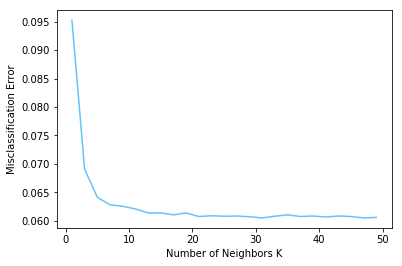

In [268]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print "The optimal number of neighbors is %d" % optimal_k

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [104]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=9)

# fitting the model
knn.fit(X_train, Y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print accuracy_score(Y_test, pred)
predictions = knn.predict_proba(X_test)[:,1]
print("AUC Score (Train): %f" % roc_auc_score(Y_test, predictions))
pred_knn=[]
pred_knn= predictions

0.937408660069314
AUC Score (Train): 0.517846


In [208]:
predictions = knn.predict_proba(xgb_test)[:,1]
#print("AUC Score (Train): %f" % roc_auc_score(Y_test, predictions))
pred_knn_t=[]
pred_knn_t= predictions

In [270]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=31)

# fitting the model
knn.fit(stacked_validation_train, Y_test)

# predict the response
#pred = knn.predict(X_test)

# evaluate accuracy
#print accuracy_score(stacked_validation_train, Y_test)
predictions = knn.predict_proba(stacked_test_train)[:,1]
#print("AUC Score (Train): %f" % roc_auc_score(Y_test, predictions))
final_knn_=[]
final_knn= predictions

In [198]:
opt = pd.DataFrame()
opt['XGBoost'] = pd.Series(pred_xg)
opt['ExtraTreesClassifier'] = pd.Series(pred_et)
opt['KNN'] = pd.Series(pred_knn)

In [199]:
opt['GradientBoosting']= pd.Series(pred_gb)

In [200]:
opt['AdaBoost']=pd.Series(pred_ad)

In [201]:
opt['RandomForest']=pd.Series(pred_rf)

In [202]:
opt.to_csv('optimize.csv',index=False)

In [203]:
stacked_validation_train= opt.copy()

In [248]:
opt_fin= pd.DataFrame()
opt_fin['XGBoost']= pd.Series(pred_xg_t)
opt_fin['ExtraTreesClassifier']=pd.Series(pred_et_t)
opt_fin['KNN'] = pd.Series(pred_knn_t)
opt_fin['GradientBoosting']= pd.Series(pred_gb_t)

In [249]:
opt_fin['AdaBoost']=pd.Series(pred_ad_t)

In [253]:
stacked_test_train.drop(drop, axis=1, inplace=True)

In [250]:
opt_fin['RandomForest']=pd.Series(pred_rf_t)

In [251]:
opt_fin.to_csv('optimizefin.csv',index=False)

In [252]:
stacked_test_train=opt_fin.copy()

In [221]:
stacked_validation_train.shape

(23949, 5)

In [222]:
Y_test.shape

(23949L,)

In [217]:
drop = ['GradientBoosting']
stacked_validation_train.drop(drop, axis=1, inplace=True)
stacked_test_train.drop(drop, axis=1, inplace=True)

In [223]:

meta_model = make_pipeline(RobustScaler(),GradientBoostingClassifier(learning_rate=0.005, n_estimators=1200,max_depth=9, min_samples_split=1200, min_samples_leaf=60, subsample=0.85, random_state=10,
warm_start=True))

In [224]:
meta_model.fit(stacked_validation_train, Y_test)


Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('gradientboostingclassifier', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.005, loss='deviance', max_depth=9,
              ...        presort='auto', random_state=10, subsample=0.85, verbose=0,
              warm_start=True))])

In [291]:
meta_model_pred = meta_model.predict_proba(stacked_test_train)[:,1]

In [292]:
print(meta_model_pred)

[0.98909618 0.98486418 0.6183292  ... 0.97534059 0.78968885 0.97247876]


In [258]:
opt_final= pd.DataFrame()

In [259]:
opt_final['XGBoost']= pd.Series(xgb_final)

In [266]:
opt_final['ExtraTreesClassifier']=pd.Series(et_final)

In [271]:
opt_final['KNN'] = pd.Series(final_knn)

In [286]:
opt_final['GradientBoosting']= pd.Series(final_gbm)

In [287]:
opt_final['AdaBoost']=pd.Series(ada_final)

In [288]:
opt_final['RandomForest']=pd.Series(rf_final)

In [315]:
opt_final["ensemble2"]=pd.Series(ensemble2)

In [316]:
opt_final["ensemble3"]=pd.Series(ensemble3)

In [317]:
final_predictions= opt_final.copy()

In [318]:
opt_final.to_csv('opt_final.csv',index=False)

In [310]:
ensemble = meta_model_pred*(1/10) + final_predictions['XGBoost']*(1.5/10) + final_predictions['ExtraTreesClassifier']*(1.5/10) + final_predictions['KNN']*(1.5/10) + final_predictions['GradientBoosting']*(1.5/10) + final_predictions['AdaBoost']*(1.5/10) + final_predictions['RandomForest']*(1.5/10)

In [299]:
submission = pd.DataFrame()
submission['Id'] = test_id
submission['renewal'] = ensemble
submission['Premium']= df_test['premium']
submission.to_csv('final_submission.csv',index=False)

In [313]:
ensemble2= final_predictions['XGBoost']

In [302]:
ensemble3= meta_model_pred

In [314]:
print(ensemble2)

0        0.979491
1        0.979491
2        0.698436
3        0.979491
4        0.962934
5        0.979491
6        0.828497
7        0.786381
8        0.979491
9        0.979491
10       0.979491
11       0.977512
12       0.579724
13       0.948176
14       0.950330
15       0.971424
16       0.979491
17       0.567821
18       0.979257
19       0.979454
20       0.909102
21       0.925260
22       0.885072
23       0.594253
24       0.979491
25       0.969172
26       0.962764
27       0.979491
28       0.632611
29       0.979491
           ...   
34194    0.979491
34195    0.979491
34196    0.979491
34197    0.979491
34198    0.977960
34199    0.963489
34200    0.979491
34201    0.979491
34202    0.975195
34203    0.979454
34204    0.979491
34205    0.979491
34206    0.979400
34207    0.979491
34208    0.979491
34209    0.979400
34210    0.979491
34211    0.979491
34212    0.979400
34213    0.977512
34214    0.950542
34215    0.971546
34216    0.979332
34217    0.733020
34218    0

NameError: name 'df' is not defined